In [59]:
import pandas as pd
import numpy as np

Firsr, I will use seaborn's pairplot to find the perfect variables to use KNN on.

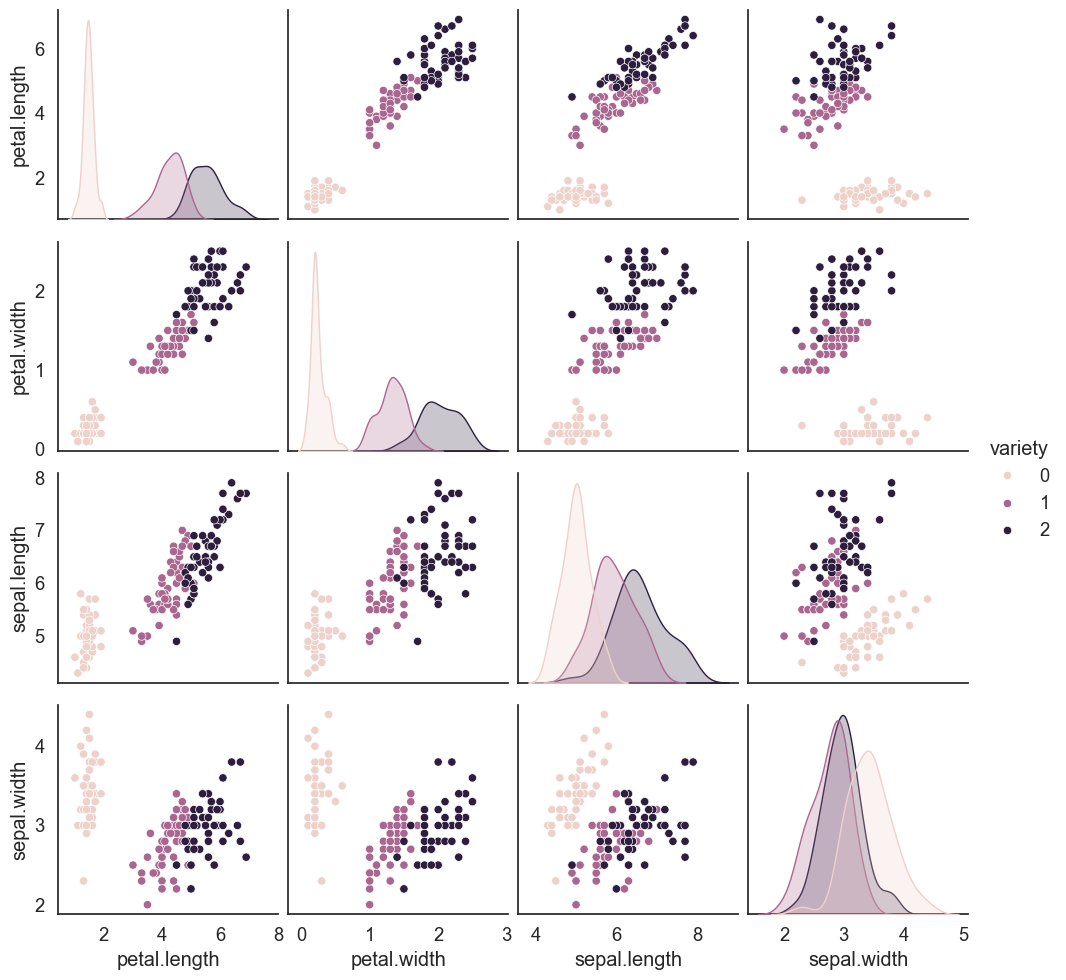

In [60]:
import seaborn as sns

# Load the original dataframe
df = pd.read_csv("https://raw.githubusercontent.com/sziccardi/CSCI4521_DataRepository/main/iris.csv")
names = list(df.columns) #Save column names

# Convert the labels from strings to numbers
df['variety'] = df['variety'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})

# Plot the pairplot
sns.pairplot(df, vars=['petal.length','petal.width', 'sepal.length', 'sepal.width'], hue='variety')


I have chosen Petal Width and Sepal Length as my variables

In [61]:
#Choose which data is featuers (X) and labels (y)
X = df[ ['petal.width','sepal.length'] ].to_numpy()
y = df['variety'].to_numpy()

Helper functions!

In [62]:
def train_test_split(X,y,test_percent):
  numRows = y.size                     #number or rows in the entire dataset
  splitPoint = int((1-test_percent)*numRows)  #the row index test_size% of the way through
  p = np.random.permutation(numRows)   #array for shuffling data
  X = X[p]
  y = y[p]

  #Training data array
  X_train = X[:splitPoint]  # training features
  y_train = y[:splitPoint]  # training labels

  #Testing data array
  X_test = X[splitPoint:]  # testing features
  y_test = y[splitPoint:] # testing labels

  return X_train, X_test, y_train, y_test

In [64]:
def accuracy(classify, X_train, y_train, X_test, y_test):
  pred = classify(X_train, y_train, X_test)
  correct_pred = (pred == y_test)
  total_preds = y_test.size
  return correct_pred.sum()/total_preds

In [65]:
def avg_accuracy(classifier, X, y, count = 200, split=0.33):
  acc = 0
  for _ in range(0,count):
    X_train, X_test, y_train, y_test = train_test_split(X,y,split)
    acc += accuracy(classifier, X_train, y_train, X_test, y_test)
  return acc/count

KNN implementation

In [69]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

In [70]:
# TODO: write a function that will use KNN to classify a whole array of test features
# Hint: use a wrapper function so that it fits within our accuracy helper function!
def knn_classifier(k):
    def knn_classify(x_train, y_train, x_test):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)

        pred = knn.predict(x_test)
        return pred
    return knn_classify

Finding the best K

In [73]:
# TODO: find the best performing K testing every third value between 1 - 50
k_values = []
acc_values = []
best_k = 0
best_acc = 0
for k in range(1, 51, 2):
    knn = knn_classifier(k)
    acc = avg_accuracy(knn, X, y)
    k_values.append(k)
    acc_values.append(acc)
    if acc > best_acc:
        best_k = k
        best_acc = acc

<Axes: xlabel='k', ylabel='accuracy'>

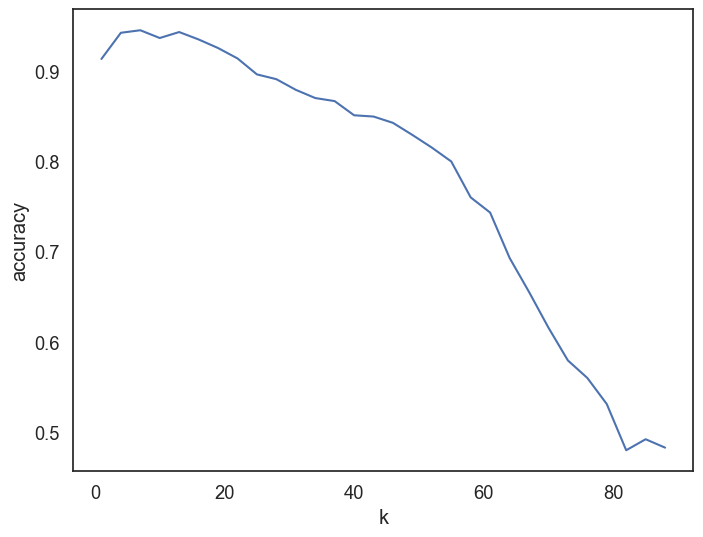

In [74]:
# If you have named dataframes, seaborn labels them auotmatically
# .... but this can be a pain sometimes
# TODO: lets turn our lists into dataframes so seaborn will label them
df = pd.DataFrame({'k': k_values, 'accuracy': acc_values})
sns.lineplot(data=df, x='k', y='accuracy')


In [75]:
# TODO: lets make another graph but this time lets compute the accuracy for both training and testing sets for different Ks
ks = np.arange(1,51)
test_acc_list = []
train_acc_list = []
for k_cur in ks:
    my_knn = knn_classifier(k_cur)
    test_acc = 0
    train_acc = 0
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
        test_acc += accuracy(my_knn, X_train, y_train, X_test, y_test)/20
        train_acc += accuracy(my_knn, X_train, y_train, X_train, y_train)/20
    test_acc_list.append(test_acc)
    train_acc_list.append(train_acc)

<Axes: xlabel='k', ylabel='accuracy'>

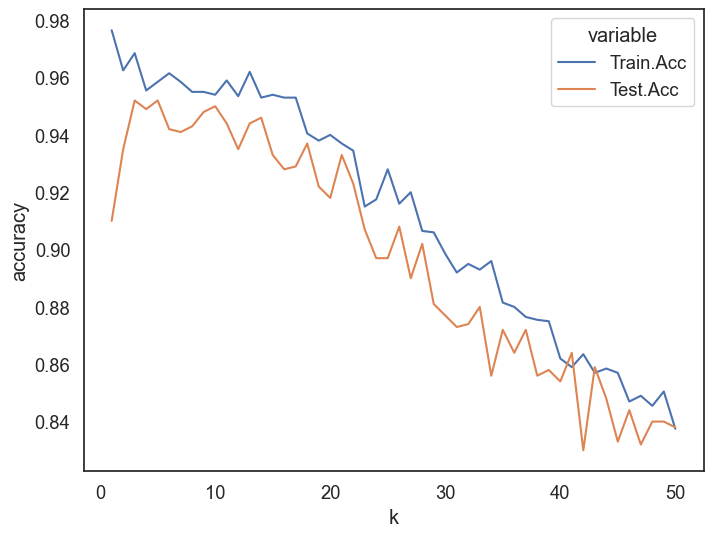

In [78]:
# helper for making a graph nicely
from pylab import rcParams
sns.set(font_scale=1.2)
sns.set_style("white") #whitegrid white dark darkgrid

rcParams['figure.figsize'] = 8, 6
result = pd.DataFrame( {"k":ks,"Train.Acc":train_acc_list,"Test.Acc":test_acc_list} )
melted_result = pd.melt(result, ['k'], var_name='variable', value_name='accuracy')
sns.lineplot(x="k", y="accuracy", hue='variable', data=melted_result)

In [79]:
# TODO: based on the graph, find the best value of k, where test accuracy is maximized
best_k = 0
best_acc = 0
for i in range(len(ks)):
    if test_acc_list[i] > best_acc:
        best_k = ks[i]
        best_acc = test_acc_list[i]
print(best_k)

3


So, the best value of $k$ is 3